In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, roc_curve, auc, roc_auc_score

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten


from keras.preprocessing.image import ImageDataGenerator
from keras.layers import BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from keras.datasets import cifar10
from keras.utils import normalize, to_categorical
from keras.layers import Dropout
from keras.optimizers import SGD, RMSprop
from keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger

import seaborn as sns

# Import and Preprocess Original Image

In [2]:
df_batteryLidImages = pd.read_csv('D:\\Volvo\\BatteryLidImages.csv')
df_batteryLidImages['ExpandedStr'] = df_batteryLidImages['Expanded']
df_batteryLidImages

,Unnamed: 0,File_Name,SSIM,Expanded,ExpandedStr
0,0,WIN_20240307_14_59_52_Pro_272_000001,0.751425,Unexpanded,Unexpanded
1,1,WIN_20240307_14_59_52_Pro_273_000002,0.746898,Unexpanded,Unexpanded
2,2,WIN_20240307_14_59_52_Pro_274_000003,0.747401,Unexpanded,Unexpanded
3,3,WIN_20240307_14_59_52_Pro_275_000004,0.747409,Unexpanded,Unexpanded
4,4,WIN_20240307_14_59_52_Pro_276_000005,0.745905,Unexpanded,Unexpanded
...,...,...,...,...,...
19530,19530,WIN_20240307_19_43_34_Pro_56_019531,0.884496,Expanded,Expanded
19531,19531,WIN_20240307_19_43_34_Pro_57_019532,0.881914,Expanded,Expanded
19532,19532,WIN_20240307_19_43_34_Pro_58_019533,0.883714,Expanded,Expanded
19533,19533,WIN_20240307_19_43_34_Pro_59_019534,0.881472,Expanded,Expanded


In [3]:
class_names = ['Unexpanded', 'Expanded']

# Define the predefined class variable names
# Convert the categorical variable to Categorical datatype and specify the class variable names
df_batteryLidImages['Expanded'] = pd.Categorical(df_batteryLidImages['Expanded'], categories=class_names)

df_batteryLidImages['Expanded'] = df_batteryLidImages['Expanded'].cat.codes.astype(str)

In [4]:
df_batteryLidImages_original = df_batteryLidImages
df_batteryLidImages_original['File_Name'] = "D:\\Volvo\\BatteryLid Images Sealing\\" + df_batteryLidImages_original['ExpandedStr'] + "\\" + df_batteryLidImages_original['File_Name'] + ".jpg"
df_batteryLidImages_original = df_batteryLidImages[['File_Name', 'Expanded']]
df_batteryLidImages_original.head()

,File_Name,Expanded
0,D:\Volvo\BatteryLid Images Sealing\Unexpanded\...,0
1,D:\Volvo\BatteryLid Images Sealing\Unexpanded\...,0
2,D:\Volvo\BatteryLid Images Sealing\Unexpanded\...,0
3,D:\Volvo\BatteryLid Images Sealing\Unexpanded\...,0
4,D:\Volvo\BatteryLid Images Sealing\Unexpanded\...,0


In [5]:
"""""
# Dependent variable (Target variable) 'Expanded' is assigned to y
y = df_batteryLidImages['Expanded']

# Independent variable File_Name is assigned to X
X = "D:\\Volvo\\BatteryLid Images Sealing\\" + df_batteryLidImages['File_Name']
"""""

'""\n# Dependent variable (Target variable) \'Expanded\' is assigned to y\ny = df_batteryLidImages[\'Expanded\']\n\n# Independent variable File_Name is assigned to X\nX = "D:\\Volvo\\BatteryLid Images Sealing\\" + df_batteryLidImages[\'File_Name\']\n'

In [6]:
#X.head()

In [7]:
#y.head()

In [8]:
"""""
# Creating the common function for splitting the dataset into test, training and validation samples
def CreateSplitTestAndTrainData(X, y):
    
    # Creating test, validation and training samples from the dataset with 15% test, 15% validation and 70% train samples
    # Holding out 15% of all data to be used for testing purposes.
    X1, X_test, y1, y_test = train_test_split(X, y, test_size = 0.15, random_state = 15)
    
    #Split again into training and validation samples
    X_train, X_valid, y_train, y_valid = train_test_split(X1, y1, test_size = 0.17647, random_state = 15)
    
    return X_train, X_test, X_valid, y_train, y_test, y_valid
"""""

'""\n# Creating the common function for splitting the dataset into test, training and validation samples\ndef CreateSplitTestAndTrainData(X, y):\n    \n    # Creating test, validation and training samples from the dataset with 15% test, 15% validation and 70% train samples\n    # Holding out 15% of all data to be used for testing purposes.\n    X1, X_test, y1, y_test = train_test_split(X, y, test_size = 0.15, random_state = 15)\n    \n    #Split again into training and validation samples\n    X_train, X_valid, y_train, y_valid = train_test_split(X1, y1, test_size = 0.17647, random_state = 15)\n    \n    return X_train, X_test, X_valid, y_train, y_test, y_valid\n'

In [9]:
# Creating test, training and validation samples from the dataset by calling the function created
# X_train, X_test, X_valid, y_train, y_test, y_valid = CreateSplitTestAndTrainData(X, y)

In [10]:
"""""
print("The size of training dataset is: ", X_train.shape)
print("The size of validation dataset is: ", X_valid.shape)
print("The size of testing dataset is: ", X_test.shape)
print("The size of training dataset y is: ", y_train.shape)
print("The size of validation dataset y is: ", y_valid.shape)
print("The size of testing dataset y is: ", y_test.shape)
"""""

'""\nprint("The size of training dataset is: ", X_train.shape)\nprint("The size of validation dataset is: ", X_valid.shape)\nprint("The size of testing dataset is: ", X_test.shape)\nprint("The size of training dataset y is: ", y_train.shape)\nprint("The size of validation dataset y is: ", y_valid.shape)\nprint("The size of testing dataset y is: ", y_test.shape)\n'

In [11]:
# Creating the common function for splitting the dataset into test, training and validation samples
def CreateSplitTestAndTrainData(data):
    
    # Creating test, validation and training samples from the dataset with 15% test, 15% validation and 70% train samples
    # Holding out 15% of all data to be used for testing purposes.
    data1, test_data = train_test_split(data, test_size = 0.15, random_state = 15)
    
    #Split again into training and validation samples
    train_data, valid_data = train_test_split(data1, test_size = 0.17647, random_state = 15)
    
    return train_data, valid_data, test_data

In [12]:
# Creating test, training and validation samples from the dataset by calling the function created
train_data_original, valid_data_original, test_data_original = CreateSplitTestAndTrainData(df_batteryLidImages_original)

In [13]:
print("The size of training dataset is: ", train_data_original.shape)
print("The size of validation dataset is: ", valid_data_original.shape)
print("The size of testing dataset is: ", test_data_original.shape)

The size of training dataset is:  (13673, 2)
The size of validation dataset is:  (2931, 2)
The size of testing dataset is:  (2931, 2)


In [14]:
# Create an ImageDataGenerator for data augmentation and preprocessing
datagen = ImageDataGenerator(rescale=1./255)

In [15]:
# Define constants
batch_size = 32
epochs = 100
image_size = (150, 150)
num_classes = 2
#class_indices = {'Unexpanded': 0, 'Expanded': 1}

In [16]:
train_generator_original = datagen.flow_from_dataframe(
    dataframe            = train_data_original,
    x_col                = 'File_Name', # column name containing file paths
    y_col                = 'Expanded', # column name containing labels
    target_size          = image_size,
    batch_size           = batch_size,
    class_mode           = 'binary', # or 'categorical' depending on your task
    shuffle              = False
    #class_indices        = class_indices
)

Found 13673 validated image filenames belonging to 2 classes.


In [17]:
valid_generator_original = datagen.flow_from_dataframe(
    dataframe            = valid_data_original,
    x_col                = 'File_Name', # column name containing file paths
    y_col                = 'Expanded', # column name containing labels
    target_size          = image_size,
    batch_size           = batch_size,
    class_mode           = 'binary', # or 'categorical' depending on your task
    shuffle              = False
   # class_indices        = class_indices
)

Found 2931 validated image filenames belonging to 2 classes.


In [18]:
test_generator_original = datagen.flow_from_dataframe(
    dataframe            = test_data_original,
    x_col                = 'File_Name', # column name containing file paths
    y_col                = 'Expanded', # column name containing labels
    target_size          = image_size,
    batch_size           = batch_size,
    class_mode           = 'binary', # or 'categorical' depending on your task
    shuffle              = False
    #class_indices        = class_indices
)

Found 2931 validated image filenames belonging to 2 classes.


# Preprocess Image After Adaptive Gaussian Thresholding

In [19]:
df_batteryLidImages_thresh_gauss = df_batteryLidImages
df_batteryLidImages_thresh_gauss['File_Name'] = df_batteryLidImages_thresh_gauss['File_Name'].str.replace('BatteryLid Images Sealing', 'BatteryLid Images Threshold Gaussian')
df_batteryLidImages_thresh_gauss = df_batteryLidImages[['File_Name', 'Expanded']]
df_batteryLidImages_thresh_gauss.head()

,File_Name,Expanded
0,D:\Volvo\BatteryLid Images Threshold Gaussian\...,0
1,D:\Volvo\BatteryLid Images Threshold Gaussian\...,0
2,D:\Volvo\BatteryLid Images Threshold Gaussian\...,0
3,D:\Volvo\BatteryLid Images Threshold Gaussian\...,0
4,D:\Volvo\BatteryLid Images Threshold Gaussian\...,0


In [20]:
# Creating test, training and validation samples from the dataset by calling the function created
train_data_thresh_gauss, valid_data_thresh_gauss, test_data_thresh_gauss = CreateSplitTestAndTrainData(df_batteryLidImages_thresh_gauss)

In [21]:
print("The size of training dataset is: ", train_data_thresh_gauss.shape)
print("The size of validation dataset is: ", valid_data_thresh_gauss.shape)
print("The size of testing dataset is: ", test_data_thresh_gauss.shape)

The size of training dataset is:  (13673, 2)
The size of validation dataset is:  (2931, 2)
The size of testing dataset is:  (2931, 2)


In [22]:
# Create an ImageDataGenerator for data augmentation and preprocessing
datagen = ImageDataGenerator(rescale=1./255)

In [23]:
train_generator_thresh_gauss = datagen.flow_from_dataframe(
    dataframe            = train_data_thresh_gauss,
    x_col                = 'File_Name', # column name containing file paths
    y_col                = 'Expanded', # column name containing labels
    target_size          = image_size,
    batch_size           = batch_size,
    class_mode           = 'binary', # or 'categorical' depending on your task
    shuffle              = False
    #class_indices        = class_indices
)

Found 13673 validated image filenames belonging to 2 classes.


In [24]:
valid_generator_thresh_gauss = datagen.flow_from_dataframe(
    dataframe            = valid_data_thresh_gauss,
    x_col                = 'File_Name', # column name containing file paths
    y_col                = 'Expanded', # column name containing labels
    target_size          = image_size,
    batch_size           = batch_size,
    class_mode           = 'binary', # or 'categorical' depending on your task
    shuffle              = False
   # class_indices        = class_indices
)

Found 2931 validated image filenames belonging to 2 classes.


In [25]:
test_generator_thresh_gauss = datagen.flow_from_dataframe(
    dataframe            = test_data_thresh_gauss,
    x_col                = 'File_Name', # column name containing file paths
    y_col                = 'Expanded', # column name containing labels
    target_size          = image_size,
    batch_size           = batch_size,
    class_mode           = 'binary', # or 'categorical' depending on your task
    shuffle              = False
    #class_indices        = class_indices
)

Found 2931 validated image filenames belonging to 2 classes.


# Preprocess Image After Adaptive Mean Thresholding

In [26]:
df_batteryLidImages_thresh_mean = df_batteryLidImages
df_batteryLidImages_thresh_mean['File_Name'] = df_batteryLidImages_thresh_mean['File_Name'].str.replace('BatteryLid Images Threshold Gaussian', 'BatteryLid Images Threshold Mean')
df_batteryLidImages_thresh_mean = df_batteryLidImages[['File_Name', 'Expanded']]
df_batteryLidImages_thresh_mean.head()

,File_Name,Expanded
0,D:\Volvo\BatteryLid Images Threshold Mean\Unex...,0
1,D:\Volvo\BatteryLid Images Threshold Mean\Unex...,0
2,D:\Volvo\BatteryLid Images Threshold Mean\Unex...,0
3,D:\Volvo\BatteryLid Images Threshold Mean\Unex...,0
4,D:\Volvo\BatteryLid Images Threshold Mean\Unex...,0


In [27]:
# Creating test, training and validation samples from the dataset by calling the function created
train_data_thresh_mean, valid_data_thresh_mean, test_data_thresh_mean = CreateSplitTestAndTrainData(df_batteryLidImages_thresh_mean)

In [28]:
print("The size of training dataset is: ", train_data_thresh_mean.shape)
print("The size of validation dataset is: ", valid_data_thresh_mean.shape)
print("The size of testing dataset is: ", test_data_thresh_mean.shape)

The size of training dataset is:  (13673, 2)
The size of validation dataset is:  (2931, 2)
The size of testing dataset is:  (2931, 2)


In [29]:
# Create an ImageDataGenerator for data augmentation and preprocessing
datagen = ImageDataGenerator(rescale=1./255)

In [30]:
train_generator_thresh_mean = datagen.flow_from_dataframe(
    dataframe            = train_data_thresh_mean,
    x_col                = 'File_Name', # column name containing file paths
    y_col                = 'Expanded', # column name containing labels
    target_size          = image_size,
    batch_size           = batch_size,
    class_mode           = 'binary', # or 'categorical' depending on your task
    shuffle              = False
    #class_indices        = class_indices
)

Found 13673 validated image filenames belonging to 2 classes.


In [31]:
valid_generator_thresh_mean = datagen.flow_from_dataframe(
    dataframe            = valid_data_thresh_mean,
    x_col                = 'File_Name', # column name containing file paths
    y_col                = 'Expanded', # column name containing labels
    target_size          = image_size,
    batch_size           = batch_size,
    class_mode           = 'binary', # or 'categorical' depending on your task
    shuffle              = False
   # class_indices        = class_indices
)

Found 2931 validated image filenames belonging to 2 classes.


In [32]:
test_generator_thresh_mean = datagen.flow_from_dataframe(
    dataframe            = test_data_thresh_mean,
    x_col                = 'File_Name', # column name containing file paths
    y_col                = 'Expanded', # column name containing labels
    target_size          = image_size,
    batch_size           = batch_size,
    class_mode           = 'binary', # or 'categorical' depending on your task
    shuffle              = False
    #class_indices        = class_indices
)

Found 2931 validated image filenames belonging to 2 classes.


# Preprocess Image After Gabor Filter

In [33]:
df_batteryLidImages_gabor = df_batteryLidImages
df_batteryLidImages_gabor['File_Name'] = df_batteryLidImages_gabor['File_Name'].str.replace('BatteryLid Images Threshold Mean', 'BatteryLid Images Gabor')
df_batteryLidImages_gabor = df_batteryLidImages[['File_Name', 'Expanded']]
df_batteryLidImages_gabor.head()

,File_Name,Expanded
0,D:\Volvo\BatteryLid Images Gabor\Unexpanded\WI...,0
1,D:\Volvo\BatteryLid Images Gabor\Unexpanded\WI...,0
2,D:\Volvo\BatteryLid Images Gabor\Unexpanded\WI...,0
3,D:\Volvo\BatteryLid Images Gabor\Unexpanded\WI...,0
4,D:\Volvo\BatteryLid Images Gabor\Unexpanded\WI...,0


In [34]:
# Creating test, training and validation samples from the dataset by calling the function created
train_data_gabor, valid_data_gabor, test_data_gabor = CreateSplitTestAndTrainData(df_batteryLidImages_gabor)

In [35]:
print("The size of training dataset is: ", train_data_gabor.shape)
print("The size of validation dataset is: ", valid_data_gabor.shape)
print("The size of testing dataset is: ", test_data_gabor.shape)

The size of training dataset is:  (13673, 2)
The size of validation dataset is:  (2931, 2)
The size of testing dataset is:  (2931, 2)


In [36]:
# Create an ImageDataGenerator for data augmentation and preprocessing
datagen = ImageDataGenerator(rescale=1./255)

In [37]:
train_generator_gabor = datagen.flow_from_dataframe(
    dataframe            = train_data_gabor,
    x_col                = 'File_Name', # column name containing file paths
    y_col                = 'Expanded', # column name containing labels
    target_size          = image_size,
    batch_size           = batch_size,
    class_mode           = 'binary', # or 'categorical' depending on your task
    shuffle              = False
    #class_indices        = class_indices
)

Found 13673 validated image filenames belonging to 2 classes.


In [38]:
valid_generator_gabor = datagen.flow_from_dataframe(
    dataframe            = valid_data_gabor,
    x_col                = 'File_Name', # column name containing file paths
    y_col                = 'Expanded', # column name containing labels
    target_size          = image_size,
    batch_size           = batch_size,
    class_mode           = 'binary', # or 'categorical' depending on your task
    shuffle              = False
   # class_indices        = class_indices
)

Found 2931 validated image filenames belonging to 2 classes.


In [39]:
test_generator_gabor = datagen.flow_from_dataframe(
    dataframe            = test_data_gabor,
    x_col                = 'File_Name', # column name containing file paths
    y_col                = 'Expanded', # column name containing labels
    target_size          = image_size,
    batch_size           = batch_size,
    class_mode           = 'binary', # or 'categorical' depending on your task
    shuffle              = False
    #class_indices        = class_indices
)

Found 2931 validated image filenames belonging to 2 classes.


# Preprocess Image After Gabor Filter And Adaptive Gaussian Threshold

In [40]:
df_batteryLidImages_gabor_thresh_gauss = df_batteryLidImages
df_batteryLidImages_gabor_thresh_gauss['File_Name'] = df_batteryLidImages_gabor_thresh_gauss['File_Name'].str.replace('BatteryLid Images Gabor', 'BatteryLid Images Gabor Threshold Gaussian')
df_batteryLidImages_gabor_thresh_gauss = df_batteryLidImages[['File_Name', 'Expanded']]
df_batteryLidImages_gabor_thresh_gauss.head()

,File_Name,Expanded
0,D:\Volvo\BatteryLid Images Gabor Threshold Gau...,0
1,D:\Volvo\BatteryLid Images Gabor Threshold Gau...,0
2,D:\Volvo\BatteryLid Images Gabor Threshold Gau...,0
3,D:\Volvo\BatteryLid Images Gabor Threshold Gau...,0
4,D:\Volvo\BatteryLid Images Gabor Threshold Gau...,0


In [41]:
# Creating test, training and validation samples from the dataset by calling the function created
train_data_gabor_thresh_gauss, valid_data_gabor_thresh_gauss, test_data_gabor_thresh_gauss = CreateSplitTestAndTrainData(df_batteryLidImages_gabor_thresh_gauss)

In [42]:
print("The size of training dataset is: ", train_data_gabor_thresh_gauss.shape)
print("The size of validation dataset is: ", valid_data_gabor_thresh_gauss.shape)
print("The size of testing dataset is: ", test_data_gabor_thresh_gauss.shape)

The size of training dataset is:  (13673, 2)
The size of validation dataset is:  (2931, 2)
The size of testing dataset is:  (2931, 2)


In [43]:
# Create an ImageDataGenerator for data augmentation and preprocessing
datagen = ImageDataGenerator(rescale=1./255)

In [44]:
train_generator_gabor_thresh_gauss = datagen.flow_from_dataframe(
    dataframe            = train_data_gabor_thresh_gauss,
    x_col                = 'File_Name', # column name containing file paths
    y_col                = 'Expanded', # column name containing labels
    target_size          = image_size,
    batch_size           = batch_size,
    class_mode           = 'binary', # or 'categorical' depending on your task
    shuffle              = False
    #class_indices        = class_indices
)

Found 13673 validated image filenames belonging to 2 classes.


In [45]:
valid_generator_gabor_thresh_gauss = datagen.flow_from_dataframe(
    dataframe            = valid_data_gabor_thresh_gauss,
    x_col                = 'File_Name', # column name containing file paths
    y_col                = 'Expanded', # column name containing labels
    target_size          = image_size,
    batch_size           = batch_size,
    class_mode           = 'binary', # or 'categorical' depending on your task
    shuffle              = False
   # class_indices        = class_indices
)

Found 2931 validated image filenames belonging to 2 classes.


In [46]:
test_generator_gabor_thresh_gauss = datagen.flow_from_dataframe(
    dataframe            = test_data_gabor_thresh_gauss,
    x_col                = 'File_Name', # column name containing file paths
    y_col                = 'Expanded', # column name containing labels
    target_size          = image_size,
    batch_size           = batch_size,
    class_mode           = 'binary', # or 'categorical' depending on your task
    shuffle              = False
    #class_indices        = class_indices
)

Found 2931 validated image filenames belonging to 2 classes.


# Preprocess Image After Gabor Filter And Adaptive Mean Threshold

In [47]:
df_batteryLidImages_gabor_thresh_mean = df_batteryLidImages
df_batteryLidImages_gabor_thresh_mean['File_Name'] = df_batteryLidImages_gabor_thresh_mean['File_Name'].str.replace('BatteryLid Images Gabor Threshold Gaussian', 'BatteryLid Images Gabor Threshold Mean')
df_batteryLidImages_gabor_thresh_mean = df_batteryLidImages[['File_Name', 'Expanded']]
df_batteryLidImages_gabor_thresh_mean.head()

,File_Name,Expanded
0,D:\Volvo\BatteryLid Images Gabor Threshold Mea...,0
1,D:\Volvo\BatteryLid Images Gabor Threshold Mea...,0
2,D:\Volvo\BatteryLid Images Gabor Threshold Mea...,0
3,D:\Volvo\BatteryLid Images Gabor Threshold Mea...,0
4,D:\Volvo\BatteryLid Images Gabor Threshold Mea...,0


In [48]:
# Creating test, training and validation samples from the dataset by calling the function created
train_data_gabor_thresh_mean, valid_data_gabor_thresh_mean, test_data_gabor_thresh_mean = CreateSplitTestAndTrainData(df_batteryLidImages_gabor_thresh_mean)

In [49]:
print("The size of training dataset is: ", train_data_gabor_thresh_mean.shape)
print("The size of validation dataset is: ", valid_data_gabor_thresh_mean.shape)
print("The size of testing dataset is: ", test_data_gabor_thresh_mean.shape)

The size of training dataset is:  (13673, 2)
The size of validation dataset is:  (2931, 2)
The size of testing dataset is:  (2931, 2)


In [50]:
# Create an ImageDataGenerator for data augmentation and preprocessing
datagen = ImageDataGenerator(rescale=1./255)

In [51]:
train_generator_gabor_thresh_mean = datagen.flow_from_dataframe(
    dataframe            = train_data_gabor_thresh_mean,
    x_col                = 'File_Name', # column name containing file paths
    y_col                = 'Expanded', # column name containing labels
    target_size          = image_size,
    batch_size           = batch_size,
    class_mode           = 'binary', # or 'categorical' depending on your task
    shuffle              = False
    #class_indices        = class_indices
)

Found 13673 validated image filenames belonging to 2 classes.


In [52]:
valid_generator_gabor_thresh_mean = datagen.flow_from_dataframe(
    dataframe            = valid_data_gabor_thresh_mean,
    x_col                = 'File_Name', # column name containing file paths
    y_col                = 'Expanded', # column name containing labels
    target_size          = image_size,
    batch_size           = batch_size,
    class_mode           = 'binary', # or 'categorical' depending on your task
    shuffle              = False
   # class_indices        = class_indices
)

Found 2931 validated image filenames belonging to 2 classes.


In [53]:
test_generator_gabor_thresh_mean = datagen.flow_from_dataframe(
    dataframe            = test_data_gabor_thresh_mean,
    x_col                = 'File_Name', # column name containing file paths
    y_col                = 'Expanded', # column name containing labels
    target_size          = image_size,
    batch_size           = batch_size,
    class_mode           = 'binary', # or 'categorical' depending on your task
    shuffle              = False
    #class_indices        = class_indices
)

Found 2931 validated image filenames belonging to 2 classes.


# Build CNN Models

# Build CNN Model with Original Image

In [54]:
# Created a dataframe to store the evaluation results
evaluation_results = pd.DataFrame(columns=['Model','Accuracy','Precision','TPR','TNR','F_Score','ROC_Value','MCC','Threshold'])

In [55]:
drop=0.25
# kernel_initializer =  'he_uniform'  #Also try 'zeros', 'random_uniform', 'he_uniform', 'glorot_uniform'

model_original = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),    
   # tf.keras.layers.BatchNormalization(),  # Add batch normalization layer
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(drop),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),    
   # tf.keras.layers.BatchNormalization(),  # Add batch normalization layer
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(drop),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
   # tf.keras.layers.BatchNormalization(),  # Add batch normalization layer
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(drop),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
   # tf.keras.layers.BatchNormalization(),  # Add batch normalization layer
    tf.keras.layers.Dropout(drop),
    tf.keras.layers.Dense(1, activation='sigmoid')  # for binary classification
])

# Compile the model
model_original.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model_original.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 74, 74, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 36, 36, 64)        0

In [56]:
"""""
# Create a model with dropout
drop=0.25
kernel_initializer =  'he_uniform'  #Also try 'zeros', 'random_uniform', 'he_uniform', 'glorot_uniform'

model_original = Sequential()
model_original.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(150, 150, 3)))
model_original.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model_original.add(MaxPooling2D((2, 2)))
model_original.add(Dropout(drop))

model_original.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model_original.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model_original.add(MaxPooling2D((2, 2)))
model_original.add(Dropout(drop))

model_original.add(Flatten())
model_original.add(Dense(512, activation='relu'))
model_original.add(Dropout(drop))
model_original.add(Dense(1, activation='sigmoid'))

opt1 = SGD(lr=0.001, momentum=0.9)
opt2 = RMSprop(lr=0.001, decay=1e-6)
opt3 = 'adam'
model_original.compile(optimizer=opt1, loss='binary_crossentropy', metrics=['accuracy'])
model_original.summary()
"""""

'""\n# Create a model with dropout\ndrop=0.25\nkernel_initializer =  \'he_uniform\'  #Also try \'zeros\', \'random_uniform\', \'he_uniform\', \'glorot_uniform\'\n\nmodel_original = Sequential()\nmodel_original.add(Conv2D(32, (3, 3), activation=\'relu\', padding=\'same\', input_shape=(150, 150, 3)))\nmodel_original.add(Conv2D(32, (3, 3), activation=\'relu\', padding=\'same\'))\nmodel_original.add(MaxPooling2D((2, 2)))\nmodel_original.add(Dropout(drop))\n\nmodel_original.add(Conv2D(64, (3, 3), activation=\'relu\', padding=\'same\'))\nmodel_original.add(Conv2D(64, (3, 3), activation=\'relu\', padding=\'same\'))\nmodel_original.add(MaxPooling2D((2, 2)))\nmodel_original.add(Dropout(drop))\n\nmodel_original.add(Flatten())\nmodel_original.add(Dense(512, activation=\'relu\'))\nmodel_original.add(Dropout(drop))\nmodel_original.add(Dense(1, activation=\'sigmoid\'))\n\nopt1 = SGD(lr=0.001, momentum=0.9)\nopt2 = RMSprop(lr=0.001, decay=1e-6)\nopt3 = \'adam\'\nmodel_original.compile(optimizer=opt1,

In [57]:
#Add Callbacks, e.g. ModelCheckpoints, earlystopping, csvlogger.
#ModelCheckpoint callback saves a model at some interval. 

#Give unique name to save all models as accuracy improves
#filepath="D:\\Volvo\\Models\\weights-improvement-{epoch:02d}-{val_accuracy:.2f}.hdf5" #File name includes epoch and validation accuracy.

#Overwrite the model each time accuracy improves. Saves a lot of space. 
filepath="D:\\Volvo\\Models\\model_original.hdf5" #File name includes epoch and validation accuracy.
#Use Mode = max for accuracy and min for loss. 
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

#https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1)
#This callback will stop the training when there is no improvement in
# the validation loss for ten consecutive epochs.

#CSVLogger logs epoch, accuracy, loss, val_accuracy, val_loss. So we can plot later.
log_csv = CSVLogger('D:\\Volvo\\Logs\\model_original.csv', separator=',', append=False)

callbacks_list_original = [checkpoint, early_stop, log_csv]

In [58]:
# Train the model
history_original     = model_original.fit(
                      train_generator_original,   
    epochs           = 100,    
    validation_data  = valid_generator_original,   
    verbose          = 1,
    callbacks        = callbacks_list_original
)

Epoch 1/100
428/428 [==============================] - ETA: 0s - loss: 0.2840 - accuracy: 0.9005
Epoch 1: val_accuracy improved from -inf to 0.97475, saving model to D:\Volvo\Models\model_original.hdf5
428/428 [==============================] - 1421s 3s/step - loss: 0.2840 - accuracy: 0.9005 - val_loss: 0.0554 - val_accuracy: 0.9748
Epoch 2/100
428/428 [==============================] - ETA: 0s - loss: 0.0618 - accuracy: 0.9759
Epoch 2: val_accuracy improved from 0.97475 to 0.98124, saving model to D:\Volvo\Models\model_original.hdf5
428/428 [==============================] - 452s 1s/step - loss: 0.0618 - accuracy: 0.9759 - val_loss: 0.0529 - val_accuracy: 0.9812
Epoch 3/100
428/428 [==============================] - ETA: 0s - loss: 0.0556 - accuracy: 0.9781
Epoch 3: val_accuracy improved from 0.98124 to 0.98294, saving model to D:\Volvo\Models\model_original.hdf5
428/428 [==============================] - 924s 2s/step - loss: 0.0556 - accuracy: 0.9781 - val_loss: 0.0414 - val_accuracy

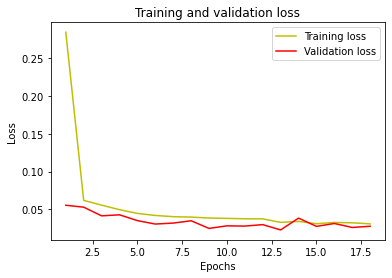

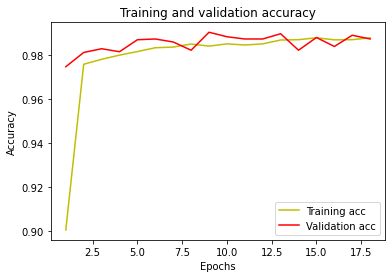

In [59]:
#####################################################################
#plot the training and validation accuracy and loss at each epoch
#If validation loss is lower than training loss this could be becuase we are applying
#regularization (Dropout) during training which won't be applied during validation. 
#Also, training loss is measured during each epoch while validation is done after the epoch.

loss_original = history_original.history['loss']
val_loss_original = history_original.history['val_loss']
epochs = range(1, len(loss_original) + 1)
plt.plot(epochs, loss_original, 'y', label='Training loss')
plt.plot(epochs, val_loss_original, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc_original = history_original.history['accuracy']
val_acc_original = history_original.history['val_accuracy']
plt.plot(epochs, acc_original, 'y', label='Training acc')
plt.plot(epochs, val_acc_original, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [60]:
#model_original.save("D:\\Volvo\\Models\\model_original.h5")

In [61]:
model_original = tf.keras.models.load_model("D:\\Volvo\\Models\\model_original.hdf5")
history_original = pd.read_csv('D:\\Volvo\\Logs\\model_original.csv')
model_original.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 74, 74, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 36, 36, 64)        0

In [62]:
"""""
#####################################################################
#plot the training and validation accuracy and loss at each epoch
#If validation loss is lower than training loss this could be becuase we are applying
#regularization (Dropout) during training which won't be applied during validation. 
#Also, training loss is measured during each epoch while validation is done after the epoch. 


loss_original = history_original['loss']
val_loss_original = history_original['val_loss']
epochs = range(1, len(loss_original) + 1)
plt.plot(epochs, loss_original, 'y', label='Training loss')
plt.plot(epochs, val_loss_original, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc_original = history_original['accuracy']
val_acc_original = history_original['val_accuracy']
plt.plot(epochs, acc_original, 'y', label='Training acc')
plt.plot(epochs, val_acc_original, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
"""""

'""\n#####################################################################\n#plot the training and validation accuracy and loss at each epoch\n#If validation loss is lower than training loss this could be becuase we are applying\n#regularization (Dropout) during training which won\'t be applied during validation. \n#Also, training loss is measured during each epoch while validation is done after the epoch. \n\n\nloss_original = history_original[\'loss\']\nval_loss_original = history_original[\'val_loss\']\nepochs = range(1, len(loss_original) + 1)\nplt.plot(epochs, loss_original, \'y\', label=\'Training loss\')\nplt.plot(epochs, val_loss_original, \'r\', label=\'Validation loss\')\nplt.title(\'Training and validation loss\')\nplt.xlabel(\'Epochs\')\nplt.ylabel(\'Loss\')\nplt.legend()\nplt.show()\n\n\nacc_original = history_original[\'accuracy\']\nval_acc_original = history_original[\'val_accuracy\']\nplt.plot(epochs, acc_original, \'y\', label=\'Training acc\')\nplt.plot(epochs, val_ac

In [63]:
test_loss_original, test_accuracy_original = model_original.evaluate(test_generator_original)

92/92 [==============================] - 47s 510ms/step - loss: 0.0284 - accuracy: 0.9884


In [64]:
# Predict probabilities for test data
y_pred_prob_original = model_original.predict(test_generator_original)

# Convert probabilities to class labels (if needed)
# For binary classification:
y_pred_original = (y_pred_prob_original > 0.5).astype(int)

# For multiclass classification:
#y_pred_original = np.argmax(y_pred_prob_original, axis=1)

# Getting ground truth labels
# For binary classification:
ground_truth_original = test_generator_original.labels

92/92 [==============================] - 119s 1s/step


In [65]:
def Calculate_Errors(model, y_test, y_pred, y_pred_probs):
    
 global evaluation_results
    
 # Calculate Accuracy of the model
 Accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
  
 # Calculate Precision of the model
 Precision = metrics.precision_score(y_true=y_test, y_pred=y_pred)
  
 # Calculate True Positive Rate (Recall) of the model
 TPR = metrics.recall_score(y_true=y_test, y_pred=y_pred)
  
 # Calculate F Score of of the model
 F_Score = metrics.f1_score(y_true=y_test, y_pred=y_pred)
    
 # Calculate MCC of the model
 MCC = metrics.matthews_corrcoef(y_true=y_test, y_pred=y_pred)

 # Calculate TNR(Specificity) of the model
 tn, fp, fn, tp = confusion_matrix(y_true=y_test, y_pred=y_pred).ravel()
 TNR = tn / (tn+fp)

 # Calculate the ROC
 roc_value = roc_auc_score(y_test, y_pred_probs)

 fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_probs)
 threshold = thresholds[np.argmax(tpr-fpr)]

 # Plot the ROC for the model
 roc_auc = metrics.auc(fpr, tpr)
 print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
 plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
 plt.legend(loc=4)
 plt.show()

 # Append the model results to the result dataframe 
 evaluation_results = evaluation_results.append(pd.DataFrame({'Model': model, 'Accuracy': Accuracy, 'Precision': Precision, 'TPR': TPR, 'TNR': TNR, 'F_Score': F_Score, 'ROC_Value': roc_value, 'MCC': MCC, 'Threshold': threshold}, index=[0]), ignore_index=True) 

ROC for the test dataset 100.0%


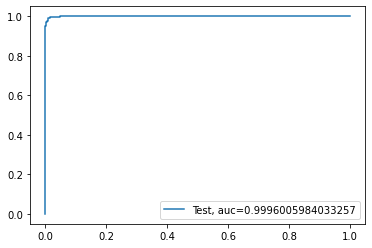

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_5156\3245499471.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  evaluation_results = evaluation_results.append(pd.DataFrame({'Model': model, 'Accuracy': Accuracy, 'Precision': Precision, 'TPR': TPR, 'TNR': TNR, 'F_Score': F_Score, 'ROC_Value': roc_value, 'MCC': MCC, 'Threshold': threshold}, index=[0]), ignore_index=True)


,Model,Accuracy,Precision,TPR,TNR,F_Score,ROC_Value,MCC,Threshold
0,CNN with Original image,0.9884,0.982603,0.993666,0.983444,0.988104,0.999601,0.976844,0.673184


In [66]:
Calculate_Errors('CNN with Original image', ground_truth_original, y_pred_original, y_pred_prob_original)
evaluation_results

In [67]:
def Create_RedAndGreen_ColorMap():
 # Define red and green colors
 red = [1, 0, 0]   # Full red
 green = [0, 1, 0] # Full green

 # Create custom colormap with only two colors (red and green)
 cmap_colors = [red, green]
 custom_cmap = LinearSegmentedColormap.from_list('custom_cmap', cmap_colors, N=2)
    
 return custom_cmap

In [68]:
# Created a common function to plot confusion matrix
def Plot_Confusion_Matrix(y_test, pred_test):
  cm = confusion_matrix(y_test, pred_test)
  plt.clf()
  plt.imshow(cm, interpolation='nearest', cmap = Create_RedAndGreen_ColorMap()) #plt.cm.Set1)
  categoryNames = ['Unexpanded','Expanded']
  plt.title('Confusion Matrix')
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  ticks = np.arange(len(categoryNames))
  plt.xticks(ticks, categoryNames)
  plt.yticks(ticks, categoryNames)
  s = [['TN','FP'], ['FN', 'TP']]
  
  for i in range(2):
      for j in range(2):
          plt.text(j, i, str(s[i][j]) + " = " + str(cm[i][j]), fontsize=12, ha = 'center')
  plt.show()

In [69]:
# Print Classification Report
print("Classification Report for CNN with Original image")
print(classification_report(ground_truth_original, y_pred_original))

Classification Report for CNN with Original image
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1510
           1       0.98      0.99      0.99      1421

    accuracy                           0.99      2931
   macro avg       0.99      0.99      0.99      2931
weighted avg       0.99      0.99      0.99      2931



Confusion Matrix for CNN with Original image


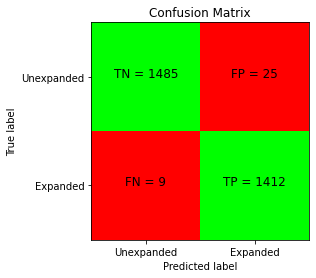

In [70]:
# Plot Confusion Matrix
print("Confusion Matrix for CNN with Original image")
Plot_Confusion_Matrix(ground_truth_original, y_pred_original)

# Build CNN Model with Image After Adaptive Gaussian Thresholding

In [71]:
drop=0.25
# kernel_initializer =  'he_uniform'  #Also try 'zeros', 'random_uniform', 'he_uniform', 'glorot_uniform'

model_thresh_gauss = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),    
   # tf.keras.layers.BatchNormalization(),  # Add batch normalization layer
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(drop),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),    
   # tf.keras.layers.BatchNormalization(),  # Add batch normalization layer
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(drop),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
   # tf.keras.layers.BatchNormalization(),  # Add batch normalization layer
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(drop),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
   # tf.keras.layers.BatchNormalization(),  # Add batch normalization layer
    tf.keras.layers.Dropout(drop),
    tf.keras.layers.Dense(1, activation='sigmoid')  # for binary classification
])

# Compile the model
model_thresh_gauss.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model_thresh_gauss.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 74, 74, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 36, 36, 64)       

In [72]:
#Add Callbacks, e.g. ModelCheckpoints, earlystopping, csvlogger.
#ModelCheckpoint callback saves a model at some interval. 

#Give unique name to save all models as accuracy improves
#filepath="D:\\Volvo\\Models\\weights-improvement-{epoch:02d}-{val_accuracy:.2f}.hdf5" #File name includes epoch and validation accuracy.

#Overwrite the model each time accuracy improves. Saves a lot of space. 
filepath="D:\\Volvo\\Models\\model_thresh_gauss.hdf5" #File name includes epoch and validation accuracy.
#Use Mode = max for accuracy and min for loss. 
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

#https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1)
#This callback will stop the training when there is no improvement in
# the validation loss for ten consecutive epochs.

#CSVLogger logs epoch, accuracy, loss, val_accuracy, val_loss. So we can plot later.
log_csv = CSVLogger('D:\\Volvo\\Logs\\model_thresh_gauss.csv', separator=',', append=False)

callbacks_list_thresh_gauss = [checkpoint, early_stop, log_csv]

In [73]:
# Train the model
history_thresh_gauss     = model_thresh_gauss.fit(
                      train_generator_thresh_gauss,   
    epochs           = 100,    
    validation_data  = valid_generator_thresh_gauss,   
    verbose          = 1,
    callbacks        = callbacks_list_thresh_gauss
)

Epoch 1/100
428/428 [==============================] - ETA: 0s - loss: 0.1700 - accuracy: 0.9567
Epoch 1: val_accuracy improved from -inf to 0.97475, saving model to D:\Volvo\Models\model_thresh_gauss.hdf5
428/428 [==============================] - 1408s 3s/step - loss: 0.1700 - accuracy: 0.9567 - val_loss: 0.0600 - val_accuracy: 0.9748
Epoch 2/100
428/428 [==============================] - ETA: 0s - loss: 0.0612 - accuracy: 0.9740
Epoch 2: val_accuracy did not improve from 0.97475
428/428 [==============================] - 362s 845ms/step - loss: 0.0612 - accuracy: 0.9740 - val_loss: 0.0836 - val_accuracy: 0.9703
Epoch 3/100
428/428 [==============================] - ETA: 0s - loss: 0.0509 - accuracy: 0.9802
Epoch 3: val_accuracy improved from 0.97475 to 0.98465, saving model to D:\Volvo\Models\model_thresh_gauss.hdf5
428/428 [==============================] - 365s 852ms/step - loss: 0.0509 - accuracy: 0.9802 - val_loss: 0.0360 - val_accuracy: 0.9846
Epoch 4/100
428/428 [=============

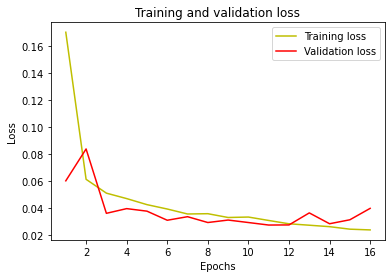

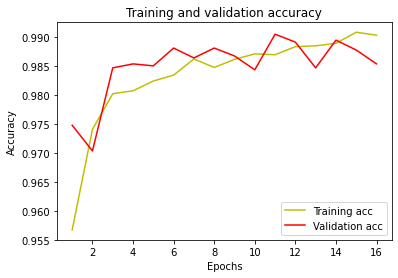

In [74]:
#####################################################################
#plot the training and validation accuracy and loss at each epoch
#If validation loss is lower than training loss this could be becuase we are applying
#regularization (Dropout) during training which won't be applied during validation. 
#Also, training loss is measured during each epoch while validation is done after the epoch.

loss_thresh_gauss = history_thresh_gauss.history['loss']
val_loss_thresh_gauss = history_thresh_gauss.history['val_loss']
epochs = range(1, len(loss_thresh_gauss) + 1)
plt.plot(epochs, loss_thresh_gauss, 'y', label='Training loss')
plt.plot(epochs, val_loss_thresh_gauss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc_thresh_gauss = history_thresh_gauss.history['accuracy']
val_acc_thresh_gauss = history_thresh_gauss.history['val_accuracy']
plt.plot(epochs, acc_thresh_gauss, 'y', label='Training acc')
plt.plot(epochs, val_acc_thresh_gauss, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [75]:
model_thresh_gauss = tf.keras.models.load_model("D:\\Volvo\\Models\\model_thresh_gauss.hdf5")
history_thresh_gauss = pd.read_csv('D:\\Volvo\\Logs\\model_thresh_gauss.csv')
model_thresh_gauss.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 74, 74, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 36, 36, 64)       

In [76]:
test_loss_thresh_gauss, test_accuracy_thresh_gauss = model_thresh_gauss.evaluate(test_generator_thresh_gauss)

92/92 [==============================] - 41s 447ms/step - loss: 0.0357 - accuracy: 0.9884


In [77]:
# Predict probabilities for test data
y_pred_prob_thresh_gauss = model_thresh_gauss.predict(test_generator_thresh_gauss)

# Convert probabilities to class labels (if needed)
# For binary classification:
y_pred_thresh_gauss = (y_pred_prob_thresh_gauss > 0.5).astype(int)

# For multiclass classification:
#y_pred_thresh_gauss = np.argmax(y_pred_prob_thresh_gauss, axis=1)

# Getting ground truth labels
# For binary classification:
ground_truth_thresh_gauss = test_generator_thresh_gauss.labels

92/92 [==============================] - 13s 139ms/step


ROC for the test dataset 99.9%


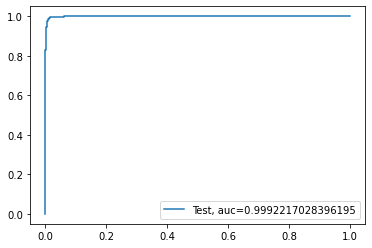

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_5156\3245499471.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  evaluation_results = evaluation_results.append(pd.DataFrame({'Model': model, 'Accuracy': Accuracy, 'Precision': Precision, 'TPR': TPR, 'TNR': TNR, 'F_Score': F_Score, 'ROC_Value': roc_value, 'MCC': MCC, 'Threshold': threshold}, index=[0]), ignore_index=True)


,Model,Accuracy,Precision,TPR,TNR,F_Score,ROC_Value,MCC,Threshold
0,CNN with Original image,0.9884,0.982603,0.993666,0.983444,0.988104,0.999601,0.976844,0.673184
1,CNN with Image After Adaptive Gaussian Thresho...,0.9884,0.982603,0.993666,0.983444,0.988104,0.999222,0.976844,0.530475


In [78]:
Calculate_Errors('CNN with Image After Adaptive Gaussian Thresholding', ground_truth_thresh_gauss, y_pred_thresh_gauss, y_pred_prob_thresh_gauss)
evaluation_results

In [79]:
# Print Classification Report
print("Classification Report for CNN with Image After Adaptive Gaussian Thresholding")
print(classification_report(ground_truth_thresh_gauss, y_pred_thresh_gauss))

Classification Report for CNN with Image After Adaptive Gaussian Thresholding
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1510
           1       0.98      0.99      0.99      1421

    accuracy                           0.99      2931
   macro avg       0.99      0.99      0.99      2931
weighted avg       0.99      0.99      0.99      2931



Confusion Matrix for CNN with Image After Adaptive Gaussian Thresholding


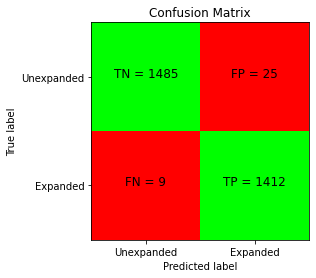

In [80]:
# Plot Confusion Matrix
print("Confusion Matrix for CNN with Image After Adaptive Gaussian Thresholding")
Plot_Confusion_Matrix(ground_truth_thresh_gauss, y_pred_thresh_gauss)

# Build CNN Model with Image After Adaptive Mean Thresholding

In [81]:
drop=0.25
# kernel_initializer =  'he_uniform'  #Also try 'zeros', 'random_uniform', 'he_uniform', 'glorot_uniform'

model_thresh_mean = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),    
   # tf.keras.layers.BatchNormalization(),  # Add batch normalization layer
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(drop),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),    
   # tf.keras.layers.BatchNormalization(),  # Add batch normalization layer
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(drop),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
   # tf.keras.layers.BatchNormalization(),  # Add batch normalization layer
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(drop),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
   # tf.keras.layers.BatchNormalization(),  # Add batch normalization layer
    tf.keras.layers.Dropout(drop),
    tf.keras.layers.Dense(1, activation='sigmoid')  # for binary classification
])

# Compile the model
model_thresh_mean.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model_thresh_mean.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 74, 74, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 dropout_9 (Dropout)         (None, 36, 36, 64)       

In [82]:
#Add Callbacks, e.g. ModelCheckpoints, earlystopping, csvlogger.
#ModelCheckpoint callback saves a model at some interval. 

#Give unique name to save all models as accuracy improves
#filepath="D:\\Volvo\\Models\\weights-improvement-{epoch:02d}-{val_accuracy:.2f}.hdf5" #File name includes epoch and validation accuracy.

#Overwrite the model each time accuracy improves. Saves a lot of space. 
filepath="D:\\Volvo\\Models\\model_thresh_mean.hdf5" #File name includes epoch and validation accuracy.
#Use Mode = max for accuracy and min for loss. 
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

#https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1)
#This callback will stop the training when there is no improvement in
# the validation loss for ten consecutive epochs.

#CSVLogger logs epoch, accuracy, loss, val_accuracy, val_loss. So we can plot later.
log_csv = CSVLogger('D:\\Volvo\\Logs\\model_thresh_mean.csv', separator=',', append=False)

callbacks_list_thresh_mean = [checkpoint, early_stop, log_csv]

In [83]:
# Train the model
history_thresh_mean     = model_thresh_mean.fit(
                      train_generator_thresh_mean,   
    epochs           = 100,    
    validation_data  = valid_generator_thresh_mean,   
    verbose          = 1,
    callbacks        = callbacks_list_thresh_mean
)

Epoch 1/100
428/428 [==============================] - ETA: 0s - loss: 0.1310 - accuracy: 0.9594
Epoch 1: val_accuracy improved from -inf to 0.98260, saving model to D:\Volvo\Models\model_thresh_mean.hdf5
428/428 [==============================] - 935s 2s/step - loss: 0.1310 - accuracy: 0.9594 - val_loss: 0.0473 - val_accuracy: 0.9826
Epoch 2/100
428/428 [==============================] - ETA: 0s - loss: 0.0483 - accuracy: 0.9801
Epoch 2: val_accuracy improved from 0.98260 to 0.98396, saving model to D:\Volvo\Models\model_thresh_mean.hdf5
428/428 [==============================] - 431s 993ms/step - loss: 0.0483 - accuracy: 0.9801 - val_loss: 0.0330 - val_accuracy: 0.9840
Epoch 3/100
428/428 [==============================] - ETA: 0s - loss: 0.0410 - accuracy: 0.9839
Epoch 3: val_accuracy improved from 0.98396 to 0.98635, saving model to D:\Volvo\Models\model_thresh_mean.hdf5
428/428 [==============================] - 600s 1s/step - loss: 0.0410 - accuracy: 0.9839 - val_loss: 0.0338 - v

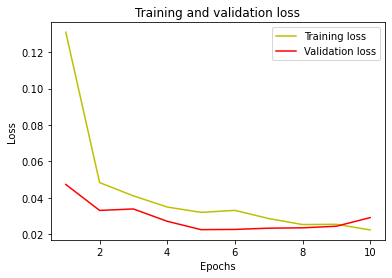

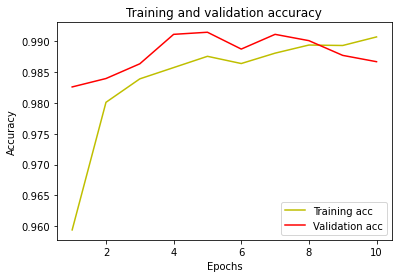

In [84]:
#####################################################################
#plot the training and validation accuracy and loss at each epoch
#If validation loss is lower than training loss this could be becuase we are applying
#regularization (Dropout) during training which won't be applied during validation. 
#Also, training loss is measured during each epoch while validation is done after the epoch.

loss_thresh_mean = history_thresh_mean.history['loss']
val_loss_thresh_mean = history_thresh_mean.history['val_loss']
epochs = range(1, len(loss_thresh_mean) + 1)
plt.plot(epochs, loss_thresh_mean, 'y', label='Training loss')
plt.plot(epochs, val_loss_thresh_mean, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc_thresh_mean = history_thresh_mean.history['accuracy']
val_acc_thresh_mean = history_thresh_mean.history['val_accuracy']
plt.plot(epochs, acc_thresh_mean, 'y', label='Training acc')
plt.plot(epochs, val_acc_thresh_mean, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [85]:
model_thresh_mean = tf.keras.models.load_model("D:\\Volvo\\Models\\model_thresh_mean.hdf5")
history_thresh_mean = pd.read_csv('D:\\Volvo\\Logs\\model_thresh_mean.csv')
model_thresh_mean.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 74, 74, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 dropout_9 (Dropout)         (None, 36, 36, 64)       

In [86]:
test_loss_thresh_mean, test_accuracy_thresh_mean = model_thresh_mean.evaluate(test_generator_thresh_mean)

92/92 [==============================] - 254s 3s/step - loss: 0.0278 - accuracy: 0.9901


In [87]:
# Predict probabilities for test data
y_pred_prob_thresh_mean = model_thresh_mean.predict(test_generator_thresh_mean)

# Convert probabilities to class labels (if needed)
# For binary classification:
y_pred_thresh_mean = (y_pred_prob_thresh_mean > 0.5).astype(int)

# For multiclass classification:
#y_pred_thresh_mean = np.argmax(y_pred_prob_thresh_mean, axis=1)

# Getting ground truth labels
# For binary classification:
ground_truth_thresh_mean = test_generator_thresh_mean.labels

92/92 [==============================] - 30s 293ms/step


ROC for the test dataset 100.0%


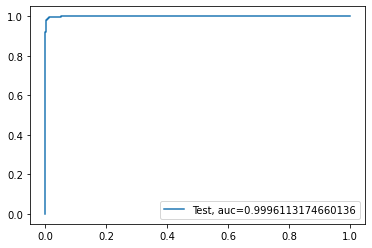

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_5156\3245499471.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  evaluation_results = evaluation_results.append(pd.DataFrame({'Model': model, 'Accuracy': Accuracy, 'Precision': Precision, 'TPR': TPR, 'TNR': TNR, 'F_Score': F_Score, 'ROC_Value': roc_value, 'MCC': MCC, 'Threshold': threshold}, index=[0]), ignore_index=True)


,Model,Accuracy,Precision,TPR,TNR,F_Score,ROC_Value,MCC,Threshold
0,CNN with Original image,0.9884,0.982603,0.993666,0.983444,0.988104,0.999601,0.976844,0.673184
1,CNN with Image After Adaptive Gaussian Thresho...,0.9884,0.982603,0.993666,0.983444,0.988104,0.999222,0.976844,0.530475
2,CNN with Image After Adaptive Mean Thresholding,0.990106,0.98468,0.995074,0.98543,0.989849,0.999611,0.980251,0.724586


In [88]:
Calculate_Errors('CNN with Image After Adaptive Mean Thresholding', ground_truth_thresh_mean, y_pred_thresh_mean, y_pred_prob_thresh_mean)
evaluation_results

In [89]:
# Print Classification Report
print("Classification Report for CNN with Image After Adaptive Mean Thresholding")
print(classification_report(ground_truth_thresh_mean, y_pred_thresh_mean))

Classification Report for CNN with Image After Adaptive Mean Thresholding
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1510
           1       0.98      1.00      0.99      1421

    accuracy                           0.99      2931
   macro avg       0.99      0.99      0.99      2931
weighted avg       0.99      0.99      0.99      2931



Confusion Matrix for CNN with Image After Adaptive Mean Thresholding


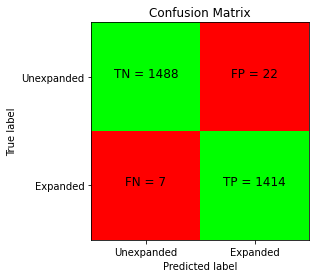

In [90]:
# Plot Confusion Matrix
print("Confusion Matrix for CNN with Image After Adaptive Mean Thresholding")
Plot_Confusion_Matrix(ground_truth_thresh_mean, y_pred_thresh_mean)

# Build CNN Model with Image After Gabor Filter

In [91]:
drop=0.25
# kernel_initializer =  'he_uniform'  #Also try 'zeros', 'random_uniform', 'he_uniform', 'glorot_uniform'

model_gabor = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),    
   # tf.keras.layers.BatchNormalization(),  # Add batch normalization layer
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(drop),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),    
   # tf.keras.layers.BatchNormalization(),  # Add batch normalization layer
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(drop),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
   # tf.keras.layers.BatchNormalization(),  # Add batch normalization layer
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(drop),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
   # tf.keras.layers.BatchNormalization(),  # Add batch normalization layer
    tf.keras.layers.Dropout(drop),
    tf.keras.layers.Dense(1, activation='sigmoid')  # for binary classification
])

# Compile the model
model_gabor.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model_gabor.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 dropout_12 (Dropout)        (None, 74, 74, 32)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 dropout_13 (Dropout)        (None, 36, 36, 64)       

In [92]:
#Add Callbacks, e.g. ModelCheckpoints, earlystopping, csvlogger.
#ModelCheckpoint callback saves a model at some interval. 

#Give unique name to save all models as accuracy improves
#filepath="D:\\Volvo\\Models\\weights-improvement-{epoch:02d}-{val_accuracy:.2f}.hdf5" #File name includes epoch and validation accuracy.

#Overwrite the model each time accuracy improves. Saves a lot of space. 
filepath="D:\\Volvo\\Models\\model_gabor.hdf5" #File name includes epoch and validation accuracy.
#Use Mode = max for accuracy and min for loss. 
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

#https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1)
#This callback will stop the training when there is no improvement in
# the validation loss for ten consecutive epochs.

#CSVLogger logs epoch, accuracy, loss, val_accuracy, val_loss. So we can plot later.
log_csv = CSVLogger('D:\\Volvo\\Logs\\model_gabor.csv', separator=',', append=False)

callbacks_list_gabor = [checkpoint, early_stop, log_csv]

In [93]:
# Train the model
history_gabor     = model_gabor.fit(
                      train_generator_gabor,   
    epochs           = 100,    
    validation_data  = valid_generator_gabor,   
    verbose          = 1,
    callbacks        = callbacks_list_gabor
)

Epoch 1/100
428/428 [==============================] - ETA: 0s - loss: 0.1970 - accuracy: 0.9246
Epoch 1: val_accuracy improved from -inf to 0.96622, saving model to D:\Volvo\Models\model_gabor.hdf5
428/428 [==============================] - 1070s 2s/step - loss: 0.1970 - accuracy: 0.9246 - val_loss: 0.0676 - val_accuracy: 0.9662
Epoch 2/100
428/428 [==============================] - ETA: 0s - loss: 0.0719 - accuracy: 0.9698
Epoch 2: val_accuracy improved from 0.96622 to 0.97885, saving model to D:\Volvo\Models\model_gabor.hdf5
428/428 [==============================] - 390s 912ms/step - loss: 0.0719 - accuracy: 0.9698 - val_loss: 0.0561 - val_accuracy: 0.9788
Epoch 3/100
428/428 [==============================] - ETA: 0s - loss: 0.0594 - accuracy: 0.9752
Epoch 3: val_accuracy improved from 0.97885 to 0.97953, saving model to D:\Volvo\Models\model_gabor.hdf5
428/428 [==============================] - 367s 857ms/step - loss: 0.0594 - accuracy: 0.9752 - val_loss: 0.0514 - val_accuracy: 0

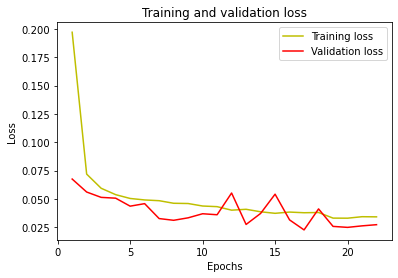

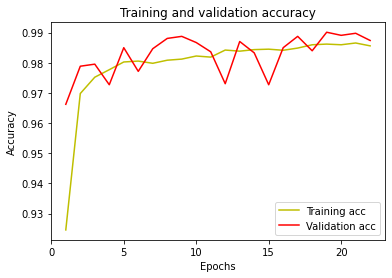

In [94]:
#####################################################################
#plot the training and validation accuracy and loss at each epoch
#If validation loss is lower than training loss this could be becuase we are applying
#regularization (Dropout) during training which won't be applied during validation. 
#Also, training loss is measured during each epoch while validation is done after the epoch.

loss_gabor = history_gabor.history['loss']
val_loss_gabor = history_gabor.history['val_loss']
epochs = range(1, len(loss_gabor) + 1)
plt.plot(epochs, loss_gabor, 'y', label='Training loss')
plt.plot(epochs, val_loss_gabor, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc_gabor = history_gabor.history['accuracy']
val_acc_gabor = history_gabor.history['val_accuracy']
plt.plot(epochs, acc_gabor, 'y', label='Training acc')
plt.plot(epochs, val_acc_gabor, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [95]:
model_gabor = tf.keras.models.load_model("D:\\Volvo\\Models\\model_gabor.hdf5")
history_gabor = pd.read_csv('D:\\Volvo\\Logs\\model_gabor.csv')
model_gabor.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 dropout_12 (Dropout)        (None, 74, 74, 32)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 dropout_13 (Dropout)        (None, 36, 36, 64)       

In [96]:
test_loss_gabor, test_accuracy_gabor = model_gabor.evaluate(test_generator_gabor)

92/92 [==============================] - 307s 3s/step - loss: 0.0263 - accuracy: 0.9904


In [97]:
# Predict probabilities for test data
y_pred_prob_gabor = model_gabor.predict(test_generator_gabor)

# Convert probabilities to class labels (if needed)
# For binary classification:
y_pred_gabor = (y_pred_prob_gabor > 0.5).astype(int)

# For multiclass classification:
#y_pred_gabor = np.argmax(y_pred_prob_gabor, axis=1)

# Getting ground truth labels
# For binary classification:
ground_truth_gabor = test_generator_gabor.labels

92/92 [==============================] - 59s 611ms/step


ROC for the test dataset 100.0%


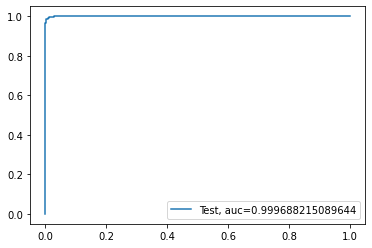

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_5156\3245499471.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  evaluation_results = evaluation_results.append(pd.DataFrame({'Model': model, 'Accuracy': Accuracy, 'Precision': Precision, 'TPR': TPR, 'TNR': TNR, 'F_Score': F_Score, 'ROC_Value': roc_value, 'MCC': MCC, 'Threshold': threshold}, index=[0]), ignore_index=True)


,Model,Accuracy,Precision,TPR,TNR,F_Score,ROC_Value,MCC,Threshold
0,CNN with Original image,0.9884,0.982603,0.993666,0.983444,0.988104,0.999601,0.976844,0.673184
1,CNN with Image After Adaptive Gaussian Thresho...,0.9884,0.982603,0.993666,0.983444,0.988104,0.999222,0.976844,0.530475
2,CNN with Image After Adaptive Mean Thresholding,0.990106,0.98468,0.995074,0.98543,0.989849,0.999611,0.980251,0.724586
3,CNN with Image After Gabor Filter,0.990447,0.990148,0.990148,0.990728,0.990148,0.999688,0.980876,0.435529


In [98]:
Calculate_Errors('CNN with Image After Gabor Filter', ground_truth_gabor, y_pred_gabor, y_pred_prob_gabor)
evaluation_results

In [99]:
# Print Classification Report
print("Classification Report for CNN with Image After Gabor Filter")
print(classification_report(ground_truth_gabor, y_pred_gabor))

Classification Report for CNN with Image After Gabor Filter
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1510
           1       0.99      0.99      0.99      1421

    accuracy                           0.99      2931
   macro avg       0.99      0.99      0.99      2931
weighted avg       0.99      0.99      0.99      2931



Confusion Matrix for CNN with Image After Gabor Filter


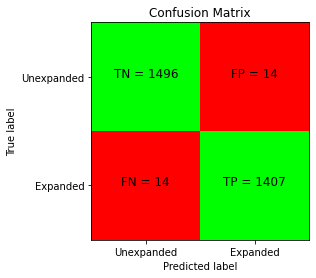

In [100]:
# Plot Confusion Matrix
print("Confusion Matrix for CNN with Image After Gabor Filter")
Plot_Confusion_Matrix(ground_truth_gabor, y_pred_gabor)

# Build CNN Model with Image After Gabor Filter And Adaptive Gaussian Thresholding

In [101]:
drop=0.25
# kernel_initializer =  'he_uniform'  #Also try 'zeros', 'random_uniform', 'he_uniform', 'glorot_uniform'

model_gabor_thresh_gauss = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),    
   # tf.keras.layers.BatchNormalization(),  # Add batch normalization layer
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(drop),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),    
   # tf.keras.layers.BatchNormalization(),  # Add batch normalization layer
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(drop),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
   # tf.keras.layers.BatchNormalization(),  # Add batch normalization layer
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(drop),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
   # tf.keras.layers.BatchNormalization(),  # Add batch normalization layer
    tf.keras.layers.Dropout(drop),
    tf.keras.layers.Dense(1, activation='sigmoid')  # for binary classification
])

# Compile the model
model_gabor_thresh_gauss.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model_gabor_thresh_gauss.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 dropout_16 (Dropout)        (None, 74, 74, 32)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 dropout_17 (Dropout)        (None, 36, 36, 64)       

In [102]:
#Add Callbacks, e.g. ModelCheckpoints, earlystopping, csvlogger.
#ModelCheckpoint callback saves a model at some interval. 

#Give unique name to save all models as accuracy improves
#filepath="D:\\Volvo\\Models\\weights-improvement-{epoch:02d}-{val_accuracy:.2f}.hdf5" #File name includes epoch and validation accuracy.

#Overwrite the model each time accuracy improves. Saves a lot of space. 
filepath="D:\\Volvo\\Models\\model_gabor_thresh_gauss.hdf5" #File name includes epoch and validation accuracy.
#Use Mode = max for accuracy and min for loss. 
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

#https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1)
#This callback will stop the training when there is no improvement in
# the validation loss for ten consecutive epochs.

#CSVLogger logs epoch, accuracy, loss, val_accuracy, val_loss. So we can plot later.
log_csv = CSVLogger('D:\\Volvo\\Logs\\model_gabor_thresh_gauss.csv', separator=',', append=False)

callbacks_list_gabor_thresh_gauss = [checkpoint, early_stop, log_csv]

In [103]:
# Train the model
history_gabor_thresh_gauss     = model_gabor_thresh_gauss.fit(
                      train_generator_gabor_thresh_gauss,   
    epochs           = 100,    
    validation_data  = valid_generator_gabor_thresh_gauss,   
    verbose          = 1,
    callbacks        = callbacks_list_gabor_thresh_gauss
)

Epoch 1/100
428/428 [==============================] - ETA: 0s - loss: 0.1494 - accuracy: 0.9566
Epoch 1: val_accuracy improved from -inf to 0.98567, saving model to D:\Volvo\Models\model_gabor_thresh_gauss.hdf5
428/428 [==============================] - 855s 2s/step - loss: 0.1494 - accuracy: 0.9566 - val_loss: 0.0405 - val_accuracy: 0.9857
Epoch 2/100
428/428 [==============================] - ETA: 0s - loss: 0.0504 - accuracy: 0.9792
Epoch 2: val_accuracy did not improve from 0.98567
428/428 [==============================] - 390s 911ms/step - loss: 0.0504 - accuracy: 0.9792 - val_loss: 0.0499 - val_accuracy: 0.9795
Epoch 3/100
428/428 [==============================] - ETA: 0s - loss: 0.0454 - accuracy: 0.9816
Epoch 3: val_accuracy did not improve from 0.98567
428/428 [==============================] - 619s 1s/step - loss: 0.0454 - accuracy: 0.9816 - val_loss: 0.0396 - val_accuracy: 0.9829
Epoch 4/100
428/428 [==============================] - ETA: 0s - loss: 0.0441 - accuracy: 0.9

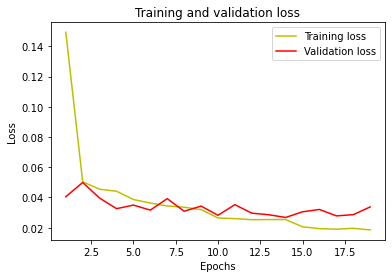

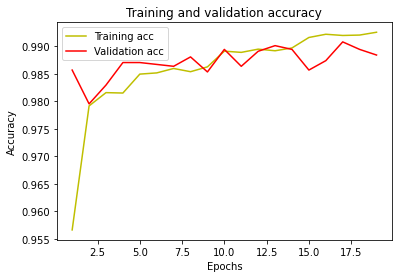

In [104]:
#####################################################################
#plot the training and validation accuracy and loss at each epoch
#If validation loss is lower than training loss this could be becuase we are applying
#regularization (Dropout) during training which won't be applied during validation. 
#Also, training loss is measured during each epoch while validation is done after the epoch.

loss_gabor_thresh_gauss = history_gabor_thresh_gauss.history['loss']
val_loss_gabor_thresh_gauss = history_gabor_thresh_gauss.history['val_loss']
epochs = range(1, len(loss_gabor_thresh_gauss) + 1)
plt.plot(epochs, loss_gabor_thresh_gauss, 'y', label='Training loss')
plt.plot(epochs, val_loss_gabor_thresh_gauss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc_gabor_thresh_gauss = history_gabor_thresh_gauss.history['accuracy']
val_acc_gabor_thresh_gauss = history_gabor_thresh_gauss.history['val_accuracy']
plt.plot(epochs, acc_gabor_thresh_gauss, 'y', label='Training acc')
plt.plot(epochs, val_acc_gabor_thresh_gauss, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [105]:
model_gabor_thresh_gauss = tf.keras.models.load_model("D:\\Volvo\\Models\\model_gabor_thresh_gauss.hdf5")
history_gabor_thresh_gauss = pd.read_csv('D:\\Volvo\\Logs\\model_gabor_thresh_gauss.csv')
model_gabor_thresh_gauss.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 dropout_16 (Dropout)        (None, 74, 74, 32)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 dropout_17 (Dropout)        (None, 36, 36, 64)       

In [106]:
test_loss_gabor_thresh_gauss, test_accuracy_gabor_thresh_gauss = model_gabor_thresh_gauss.evaluate(test_generator_gabor_thresh_gauss)

92/92 [==============================] - 268s 3s/step - loss: 0.0233 - accuracy: 0.9891


In [107]:
# Predict probabilities for test data
y_pred_prob_gabor_thresh_gauss = model_gabor_thresh_gauss.predict(test_generator_gabor_thresh_gauss)

# Convert probabilities to class labels (if needed)
# For binary classification:
y_pred_gabor_thresh_gauss = (y_pred_prob_gabor_thresh_gauss > 0.5).astype(int)

# For multiclass classification:
#y_pred_gabor_thresh_gauss = np.argmax(y_pred_prob_gabor_thresh_gauss, axis=1)

# Getting ground truth labels
# For binary classification:
ground_truth_gabor_thresh_gauss = test_generator_gabor_thresh_gauss.labels

92/92 [==============================] - 94s 994ms/step


ROC for the test dataset 100.0%


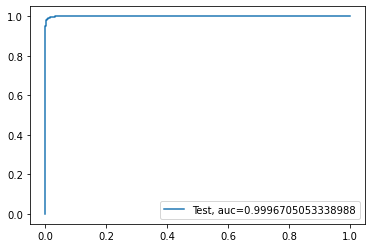

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_5156\3245499471.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  evaluation_results = evaluation_results.append(pd.DataFrame({'Model': model, 'Accuracy': Accuracy, 'Precision': Precision, 'TPR': TPR, 'TNR': TNR, 'F_Score': F_Score, 'ROC_Value': roc_value, 'MCC': MCC, 'Threshold': threshold}, index=[0]), ignore_index=True)


,Model,Accuracy,Precision,TPR,TNR,F_Score,ROC_Value,MCC,Threshold
0,CNN with Original image,0.9884,0.982603,0.993666,0.983444,0.988104,0.999601,0.976844,0.673184
1,CNN with Image After Adaptive Gaussian Thresho...,0.9884,0.982603,0.993666,0.983444,0.988104,0.999222,0.976844,0.530475
2,CNN with Image After Adaptive Mean Thresholding,0.990106,0.98468,0.995074,0.98543,0.989849,0.999611,0.980251,0.724586
3,CNN with Image After Gabor Filter,0.990447,0.990148,0.990148,0.990728,0.990148,0.999688,0.980876,0.435529
4,CNN with Image After Gabor Filter and Adaptive...,0.989082,0.987368,0.990148,0.988079,0.988756,0.999671,0.97815,0.579517


In [108]:
Calculate_Errors('CNN with Image After Gabor Filter and Adaptive Gaussian Thresholding', ground_truth_gabor_thresh_gauss, y_pred_gabor_thresh_gauss, y_pred_prob_gabor_thresh_gauss)
evaluation_results

In [109]:
# Print Classification Report
print("Classification Report for CNN with Image After Gabor Filter and Adaptive Gaussian Thresholding")
print(classification_report(ground_truth_gabor_thresh_gauss, y_pred_gabor_thresh_gauss))

Classification Report for CNN with Image After Gabor Filter and Adaptive Gaussian Thresholding
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1510
           1       0.99      0.99      0.99      1421

    accuracy                           0.99      2931
   macro avg       0.99      0.99      0.99      2931
weighted avg       0.99      0.99      0.99      2931



Confusion Matrix for CNN with Image After Gabor Filter and Adaptive Gaussian Thresholding


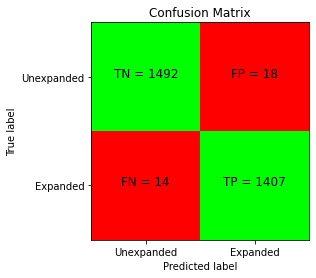

In [110]:
# Plot Confusion Matrix
print("Confusion Matrix for CNN with Image After Gabor Filter and Adaptive Gaussian Thresholding")
Plot_Confusion_Matrix(ground_truth_gabor_thresh_gauss, y_pred_gabor_thresh_gauss)

# Build CNN Model with Image After Gabor Filter And Adaptive Mean Thresholding

In [111]:
drop=0.25
# kernel_initializer =  'he_uniform'  #Also try 'zeros', 'random_uniform', 'he_uniform', 'glorot_uniform'

model_gabor_thresh_mean = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),    
   # tf.keras.layers.BatchNormalization(),  # Add batch normalization layer
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(drop),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),    
   # tf.keras.layers.BatchNormalization(),  # Add batch normalization layer
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(drop),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
   # tf.keras.layers.BatchNormalization(),  # Add batch normalization layer
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(drop),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
   # tf.keras.layers.BatchNormalization(),  # Add batch normalization layer
    tf.keras.layers.Dropout(drop),
    tf.keras.layers.Dense(1, activation='sigmoid')  # for binary classification
])

# Compile the model
model_gabor_thresh_mean.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model_gabor_thresh_mean.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 dropout_20 (Dropout)        (None, 74, 74, 32)        0         
                                                                 
 conv2d_16 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 dropout_21 (Dropout)        (None, 36, 36, 64)       

In [112]:
#Add Callbacks, e.g. ModelCheckpoints, earlystopping, csvlogger.
#ModelCheckpoint callback saves a model at some interval. 

#Give unique name to save all models as accuracy improves
#filepath="D:\\Volvo\\Models\\weights-improvement-{epoch:02d}-{val_accuracy:.2f}.hdf5" #File name includes epoch and validation accuracy.

#Overwrite the model each time accuracy improves. Saves a lot of space. 
filepath="D:\\Volvo\\Models\\model_gabor_thresh_mean.hdf5" #File name includes epoch and validation accuracy.
#Use Mode = max for accuracy and min for loss. 
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

#https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1)
#This callback will stop the training when there is no improvement in
# the validation loss for ten consecutive epochs.

#CSVLogger logs epoch, accuracy, loss, val_accuracy, val_loss. So we can plot later.
log_csv = CSVLogger('D:\\Volvo\\Logs\\model_gabor_thresh_mean.csv', separator=',', append=False)

callbacks_list_gabor_thresh_mean = [checkpoint, early_stop, log_csv]

In [113]:
# Train the model
history_gabor_thresh_mean     = model_gabor_thresh_mean.fit(
                      train_generator_gabor_thresh_mean,   
    epochs           = 100,    
    validation_data  = valid_generator_gabor_thresh_mean,   
    verbose          = 1,
    callbacks        = callbacks_list_gabor_thresh_mean
)

Epoch 1/100
428/428 [==============================] - ETA: 0s - loss: 0.1112 - accuracy: 0.9635
Epoch 1: val_accuracy improved from -inf to 0.98226, saving model to D:\Volvo\Models\model_gabor_thresh_mean.hdf5
428/428 [==============================] - 1589s 4s/step - loss: 0.1112 - accuracy: 0.9635 - val_loss: 0.0462 - val_accuracy: 0.9823
Epoch 2/100
428/428 [==============================] - ETA: 0s - loss: 0.0447 - accuracy: 0.9818
Epoch 2: val_accuracy improved from 0.98226 to 0.98669, saving model to D:\Volvo\Models\model_gabor_thresh_mean.hdf5
428/428 [==============================] - 384s 898ms/step - loss: 0.0447 - accuracy: 0.9818 - val_loss: 0.0317 - val_accuracy: 0.9867
Epoch 3/100
428/428 [==============================] - ETA: 0s - loss: 0.0405 - accuracy: 0.9836
Epoch 3: val_accuracy did not improve from 0.98669
428/428 [==============================] - 372s 870ms/step - loss: 0.0405 - accuracy: 0.9836 - val_loss: 0.0648 - val_accuracy: 0.9717
Epoch 4/100
428/428 [===

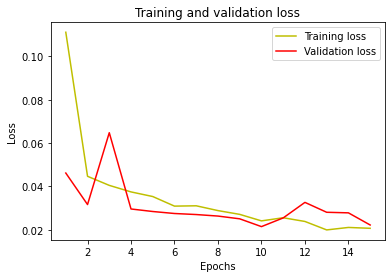

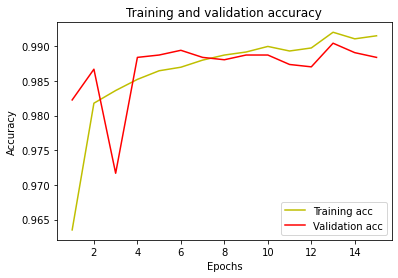

In [114]:
#####################################################################
#plot the training and validation accuracy and loss at each epoch
#If validation loss is lower than training loss this could be becuase we are applying
#regularization (Dropout) during training which won't be applied during validation. 
#Also, training loss is measured during each epoch while validation is done after the epoch.

loss_gabor_thresh_mean = history_gabor_thresh_mean.history['loss']
val_loss_gabor_thresh_mean = history_gabor_thresh_mean.history['val_loss']
epochs = range(1, len(loss_gabor_thresh_mean) + 1)
plt.plot(epochs, loss_gabor_thresh_mean, 'y', label='Training loss')
plt.plot(epochs, val_loss_gabor_thresh_mean, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc_gabor_thresh_mean = history_gabor_thresh_mean.history['accuracy']
val_acc_gabor_thresh_mean = history_gabor_thresh_mean.history['val_accuracy']
plt.plot(epochs, acc_gabor_thresh_mean, 'y', label='Training acc')
plt.plot(epochs, val_acc_gabor_thresh_mean, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [115]:
model_gabor_thresh_mean = tf.keras.models.load_model("D:\\Volvo\\Models\\model_gabor_thresh_mean.hdf5")
history_gabor_thresh_mean = pd.read_csv('D:\\Volvo\\Logs\\model_gabor_thresh_mean.csv')
model_gabor_thresh_mean.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 dropout_20 (Dropout)        (None, 74, 74, 32)        0         
                                                                 
 conv2d_16 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 dropout_21 (Dropout)        (None, 36, 36, 64)       

In [116]:
test_loss_gabor_thresh_mean, test_accuracy_gabor_thresh_mean = model_gabor_thresh_mean.evaluate(test_generator_gabor_thresh_mean)

92/92 [==============================] - 244s 3s/step - loss: 0.0292 - accuracy: 0.9887


In [117]:
# Predict probabilities for test data
y_pred_prob_gabor_thresh_mean = model_gabor_thresh_mean.predict(test_generator_gabor_thresh_mean)

# Convert probabilities to class labels (if needed)
# For binary classification:
y_pred_gabor_thresh_mean = (y_pred_prob_gabor_thresh_mean > 0.5).astype(int)

# For multiclass classification:
#y_pred_gabor_thresh_mean = np.argmax(y_pred_prob_gabor_thresh_mean, axis=1)

# Getting ground truth labels
# For binary classification:
ground_truth_gabor_thresh_mean = test_generator_gabor_thresh_mean.labels

92/92 [==============================] - 97s 1s/step


ROC for the test dataset 99.9%


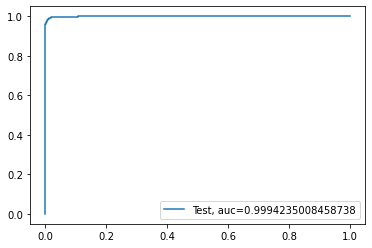

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_5156\3245499471.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  evaluation_results = evaluation_results.append(pd.DataFrame({'Model': model, 'Accuracy': Accuracy, 'Precision': Precision, 'TPR': TPR, 'TNR': TNR, 'F_Score': F_Score, 'ROC_Value': roc_value, 'MCC': MCC, 'Threshold': threshold}, index=[0]), ignore_index=True)


,Model,Accuracy,Precision,TPR,TNR,F_Score,ROC_Value,MCC,Threshold
0,CNN with Original image,0.9884,0.982603,0.993666,0.983444,0.988104,0.999601,0.976844,0.673184
1,CNN with Image After Adaptive Gaussian Thresho...,0.9884,0.982603,0.993666,0.983444,0.988104,0.999222,0.976844,0.530475
2,CNN with Image After Adaptive Mean Thresholding,0.990106,0.98468,0.995074,0.98543,0.989849,0.999611,0.980251,0.724586
3,CNN with Image After Gabor Filter,0.990447,0.990148,0.990148,0.990728,0.990148,0.999688,0.980876,0.435529
4,CNN with Image After Gabor Filter and Adaptive...,0.989082,0.987368,0.990148,0.988079,0.988756,0.999671,0.97815,0.579517
5,CNN with Image After Gabor Filter and Adaptive...,0.988741,0.990806,0.985925,0.991391,0.98836,0.999424,0.977469,0.362923


In [118]:
Calculate_Errors('CNN with Image After Gabor Filter and Adaptive Mean Thresholding', ground_truth_gabor_thresh_mean, y_pred_gabor_thresh_mean, y_pred_prob_gabor_thresh_mean)
evaluation_results

In [119]:
# Print Classification Report
print("Classification Report for CNN with Image After Gabor Filter and Adaptive Mean Thresholding")
print(classification_report(ground_truth_gabor_thresh_mean, y_pred_gabor_thresh_mean))

Classification Report for CNN with Image After Gabor Filter and Adaptive Mean Thresholding
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1510
           1       0.99      0.99      0.99      1421

    accuracy                           0.99      2931
   macro avg       0.99      0.99      0.99      2931
weighted avg       0.99      0.99      0.99      2931



Confusion Matrix for CNN with Image After Gabor Filter and Adaptive Mean Thresholding


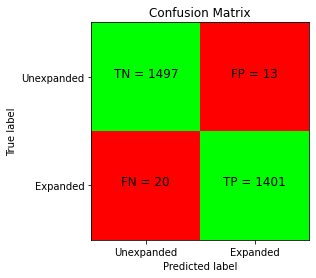

In [120]:
# Plot Confusion Matrix
print("Confusion Matrix for CNN with Image After Gabor Filter and Adaptive Mean Thresholding")
Plot_Confusion_Matrix(ground_truth_gabor_thresh_mean, y_pred_gabor_thresh_mean)

In [121]:
evaluation_results.to_csv('D:\\Volvo\\EvaluationResults.csv')